In [24]:
from __future__ import unicode_literals
from onmt.utils.logging import init_logger
from onmt.utils.misc import split_corpus
from onmt.translate.translator import build_translator

import onmt.opts as opts
from onmt.utils.parse import ArgumentParser

import matplotlib.pyplot as plt
import numpy as np
import random
import csv
import importlib

from params_serialize import *
from plotter import *

import plot_agent

In [25]:
importlib.reload(plot_agent)

<module 'plot_agent' from '/Users/mac/Desktop/syt/Deep-Learning/Projects-M/Plotting-agent-DEMO/ChartDialog/models/seq2seq/plot_agent.py'>

In [26]:
# class plot_agent:
    
#     #################################
#     ### Model Initialization Part ###
#     #################################
    
#     def __init__(self, model_addr, src_addr):
#         self.translator = self.__build_translator(model_addr, src_addr)
#         self.data = None
#         self.non_tpspec = "plot_type none contour_plot_type none number_of_levels none density none arrow_size none arrow_style none surface_color none line_style none line_width none line_color none marker_type none marker_size none marker_face_color none marker_edge_width none marker_edge_color none marker_interval none number_of_bins none bar_relative_width none bar_face_color none bar_edge_width none bar_edge_color none bar_orientation none bar_width none bar_height none color_map none explode none precision_digits none percentage_distance_from_center none label_distance_from_center none radius none section_edge_width none section_edge_color none show_error_bar none error_bar_cap_size none error_bar_cap_thickness none error_bar_color none color_bar_orientation none color_bar_length none color_bar_thickness none polarize none x_axis_scale none y_axis_scale none x_axis_position none y_axis_position none data_series_name none font_size none invert_x_axis none invert_y_axis none invert_z_axis none grid_line_type none grid_line_color none grid_line_style none grid_line_width none"
#         self.plot_param = deserialize_single_1(self.non_tpspec)
#         self.undo_stack = []
#         self.redo_stack = []
#         self.test_mode = True
#         self.src_addr = src_addr
#         random.seed(2)
    
    
#     def __build_translator(self, model_addr, src_addr):
#         parser = ArgumentParser()
#         opts.config_opts(parser)
#         opts.translate_opts(parser)
#         opt = parser.parse_args(['-model', model_addr, '-src', src_addr])
#         return build_translator(opt, report_score=False)
    
    
#     def __update_tpspec(self, delta_tpspec):
#         # The delta_tpspec is in the form of dict()
#         ori_param = delta_tpspec.copy() # used to store the params before update
#         for k in delta_tpspec.keys():
#             ori_param[k] = self.plot_param[k]
#             self.plot_param[k] = delta_tpspec[k]
#         return ori_param
    
    
#     def __natural_lang_translate(self, order):
#         text = order
#         if "||" not in text:
#             text = [serialize_single_1(self.plot_param) + " || " + order]
#         out = self.translator.translate(src=text, batch_size=1)
#         if self.test_mode:
#             print("Delta TPS:", deserialize_single_1(out[1][0][0]))
#         return deserialize_single_1(out[1][0][0])
    
    
#     #######################
#     #### Plotting Part ####
#     #######################
    
    
#     def generate_data(self):
#         self.__formalize_param()
#         if self.plot_param['plot_type'] == 'line chart':
#             return Line_data_sampler(**self.plot_param)
#         elif self.plot_param['plot_type'] == 'histogram':
#             return Histogram_data_sampler(**self.plot_param)
#         elif self.plot_param['plot_type'] == 'scatter plot':
#             return Scatter_data_sampler(**self.plot_param)
#         elif self.plot_param['plot_type'] == 'bar plot':
#             return Bar_data_sampler(**self.plot_param)
#         elif self.plot_param['plot_type'] == 'matrix display':
#             return Matrix_display_data_sampler(**self.plot_param)
#         elif self.plot_param['plot_type'] == 'contour plot':
#             return Contour_data_sampler(**self.plot_param)
#         elif self.plot_param['plot_type'] == 'streamline plot':
#             return Streamline_data_sampler(**self.plot_param)
#         elif self.plot_param['plot_type'] == '3D surface':
#             return Surface_3d_data_sampler(**self.plot_param)
#         elif self.plot_param['plot_type'] == 'pie chart':
#             return Pie_data_sampler(**self.plot_param)
#         else:
#             return (None, None)
    
    
#     def plotting(self):
#         if self.data is None:
#             return -1
        
#         # formalize the plot_param
#         self.__formalize_param()
        
#         kwargs_unnat = plotter_kwargs_unnaturalize(**self.plot_param)
#         try:
#             plt.show(plotter(**self.data, **kwargs_unnat))
#         except Exception as e:
#             print("information not enough for plotting")
#             raise e
#         return 0
    
    
#     ## deserilize will turn every boolean, numeric and None-type value into string
#     ## which can undermine plotting
#     def __formalize_param(self):
#         for k in self.plot_param.keys():
#             if type(self.plot_param[k]) == str:
#                 if self.plot_param[k].lower() == 'none':
#                     self.plot_param[k] = None
#                 elif self.plot_param[k].isnumeric() and ('.' in self.plot_param[k]):
#                     self.plot_param[k] = float(self.plot_param[k])
#                 elif self.plot_param[k].isnumeric():
#                     self.plot_param[k] = int(self.plot_param[k])
#                 elif self.plot_param[k].lower() == 'true':
#                     self.plot_param[k] = True
#                 elif self.plot_param[k].lower() == 'false':
#                     self.plot_param[k] = False
    
    
#     ########################
#     #### Interface Part ####
#     ########################
    
#     def undo(self):
#         if len(self.undo_stack) == 0:
#             return -1
#         delta_param = self.undo_stack.pop()
#         ori_param = self.__update_tpspec(delta_param)
#         self.redo_stack.append(ori_param)
#         return 0
        
    
#     def redo(self):
#         if len(self.redo_stack) == 0:
#             return -1
#         delta_param = self.redo_stack.pop()
#         ori_param = self.__update_tpspec(delta_param)
#         self.undo_stack.append(ori_param)
#         return 0
    
    
#     def update(self, delta_tpspec):
#         ori_param = self.__update_tpspec(delta_tpspec)
        
#         self.undo_stack.append(ori_param)
#         # manual input, clear redo stack
#         self.redo_stack = []
        
    
#     def __param_print(self):
#         tmp = []
#         for k in self.plot_param.keys():
#             if self.plot_param[k] != None and self.plot_param[k] != "none":
#                 tmp.append((k, self.plot_param[k]))
#         print(tmp)
    

#     # load a dialog from a file
#     def load_dialog(self, file_addr):
#         with open(file_addr) as f:
#             for ins in f:
#                 ins = ins.replace('\n', '')
#                 if self.test_mode:
#                     print("Input>:", ins)
#                 self.update(self.__natural_lang_translate(ins))
    
    
#     # load a dialog from a training/test file:
#     def load_dialog_format(self, file_addr):
#         with open(file_addr) as f:
#             all_ins = f.read().split(self.non_tpspec)
#             ins_set = random.choice(all_ins).split('\n')
#             for ins in ins_set[:len(ins_set)-1]:
#                 ins = ins.split('|| ')[1]
#                 if self.test_mode:
#                     print("Input>:", ins)
#                 self.update(self.__natural_lang_translate(ins))
    
    
#     # Special instruction: set label and title
#     def setlabel(self, lab):
#         if lab in ['x', 'y', 'title']:
#             tit = input(lab+": ")
#             if lab == 'x':
#                 self.plot_param['x_axis_label'] = tit
#             elif lab == 'y':
#                 self.plot_param['y_axis_label'] = tit
#             else:
#                 self.plot_param['plot_title'] = tit
#             return 0;
#         else:
#             return -1;
    
    
#     def interface(self):
#         while True:
#             ins = input(">: ")
#             if ins=="undo":
#                 if self.undo() == -1:
#                     print("undo failed.")
#                 if self.test_mode:
#                     self.plotting()
            
#             elif ins=="redo":
#                 if self.redo() == -1:
#                     print("redo failed.")
#                 if self.test_mode:
#                     self.plotting()
                    
#             elif ins=="plot":
#                 if self.plotting() == -1:
#                     print("Plot failed, data missing.")
#                     inq = input("Do you want to generate data? [Y/n]: ")
#                     if inq != 'n' and inq != 'N':
#                         self.data, label_setting = self.generate_data()
#                         if self.data == None:
#                             print("Please specify the plot type.")
#                         else:
#                             self.update(label_setting)
#                             self.plotting()
            
#             elif ins=="generate data":
#                 self.data, label_setting = self.generate_data()
#                 if self.data == None:
#                     print("Data generation failed. Please specify the plot type.")
#                 else:
#                     self.update(label_setting)
            
#             elif ins=="print param":
#                 self.__param_print()
            
#             elif ins=="load data":
#                 data_type=input("Enter the type of your data: ")
#                 data_addr=input("Enter the address of your data file: ")
#                 data_got = self.__data_reader(data_type, data_addr)
#                 if data_got is None:
#                     print("Data loading failed")
#                 else:
#                     self.data = data_got
                    
#             elif ins=="load csv":
#                 self.data=self.csv_interface()
                    
#             elif ins=="load dialog":
#                 file_addr=input("What's the path of the dialog file? ")
#                 try:
#                     self.load_dialog(file_addr)
#                 except FileNotFoundError:
#                     print("It seems I can't find your dialog file with the given path.")
                    
#             elif ins=="load source dialog":
#                 self.load_dialog_format(self.src_addr)
            
#             elif ins=="set labels":
#                 while True:
#                     lab = input("What label would you like to set? [x/y/title]: ")
#                     if self.setlabel(lab) == -1:
#                         print("Invalid input.")
#                     con = input("Continue setting labels? [y/N]: ")
#                     if con != 'y' and con != 'Y':
#                         break;
#                 if self.test_mode:
#                     self.plotting()
            
#             elif ins=='end':
#                 break;
            
#             elif ins=='test':
#                 self.test_mode = not self.test_mode
            
#             elif ins=='reset':
#                 self.data = None
#                 self.plot_param = deserialize_single_1(self.non_tpspec)
#                 self.undo_stack = []
#                 self.redo_stack = []
            
#             else:
#                 self.update(self.__natural_lang_translate(ins))
#                 if self.test_mode: 
#                     self.plotting()
    
    
#     #######################
#     ## Data Loading Part ##
#     #######################
    
#     def __data_reader(self, data_type, src_addr):
#         with open(src_addr) as f:
#             dat = f.read().split('\n')

#             # data_req = 1d xy
#             if data_type == "pie":
#                 x = tuple(dat[0].split(" "))
#                 y = [float(d) for d in dat[1].split(" ")]
#                 return {'x':x, 'y':y, 'c_type':data_type}

#             # data_req = 1d xyz
#             elif data_type == 'line' or data_type == 'scatter':
#                 x = np.array([float(d) for d in dat[0].split(" ")])
#                 y = np.array([float(d) for d in dat[1].split(" ")])
#                 z = np.array([float(d) for d in dat[2].split(" ")])
#                 return {'x':x, 'y':y, 'z':z, 'c_type':data_type}

#             # data_req = 1d xyz + bar_base (single float)
#             elif data_type == 'bar':
#                 x = np.array([float(d) for d in dat[0].split(" ")])
#                 y = np.array([float(d) for d in dat[1].split(" ")])
#                 z = np.array([float(d) for d in dat[2].split(" ")])
#                 bar_base = float(dat[3])
#                 return {'x':x, 'y':y, 'z':z, 'bar_base':bar_base, 'c_type':data_type}

#             # data_req = 1d x + hist_range (two integer indicating range)
#             elif data_type == 'histogram':
#                 x = np.array([float(d) for d in dat[0].split(" ")])
#                 his = dat[1].replace(",", "").replace("(", "").replace(")", "").split(" ")
#                 hist_range = (int(his[0]), int(his[1]))
#                 return {'x':x, 'hist_range':hist_range, 'c_type':data_type}

#             # data_req = 2d x
#             elif data_type == 'matrix_display':
#                 x = []
#                 for line in dat:
#                     x.append([float(d) for d in line.split(" ")])
#                 return {'x':np.array(x), 'c_type':data_type}

#             # data_req = 2d xyz
#             elif data_type == 'contour' or data_type == 'surface_3d':
#                 dimen = [[], [], []]
#                 cur_dim = 0
#                 for line in dat:
#                     # there are only 3 dimension for this data. Each dimension is divided by a blank line.
#                     if cur_dim >= 3:
#                         return None
#                     if line == "":
#                         cur_dim += 1
#                     else:
#                         dimen[cur_dim].append([float(d) for d in line.split(" ")])
#                 return {'x':np.array(dimen[0]), 'y':np.array(dimen[1]), 'z':np.array(dimen[2]), 'c_type':data_type}

#             # data_req = 2d xyuvz
#             elif data_type == 'streamline':
#                 dimen = [[], [], [], [], []]
#                 cur_dim = 0
#                 for line in dat:
#                     # there are only 5 dimension for this data. Each dimension is divided by a blank line.
#                     if cur_dim >= 5:
#                         return None
#                     if line == "":
#                         cur_dim += 1
#                     else:
#                         dimen[cur_dim].append([float(d) for d in line.split(" ")])
#                 return {'x':np.array(dimen[0]), 'y':np.array(dimen[1]), 'u':np.array(dimen[2]),
#                         'y':np.array(dimen[3]), 'z':np.array(dimen[4]), 'c_type':data_type}

#             # data type not identified
#             else:
#                 return None
     
    
#     def __query_help(self, hint, header, data):
#         q = input(hint)
#         while q[0] == '?':
#             q = q.replace('?', '')
#             if ':' not in q:
#                 if q == "header":
#                     print(header)
#                 elif q in header:
#                     print(header.index(q), set([data[d][q] for d in range(0, len(data))]))
#                 else:
#                     print("Cannot process the query. Please try again.")
#             else:
#                 q = q.split(':')
#                 if q[1] not in header:
#                     print("The attribute is not in header. Please try again.")
#                 else:
#                     l = [data[d][q[1]] for d in range(0, len(data))]
#                     if q[0] not in l:
#                         print("The element is not in the specified attribute. Please try again.")
#                     else:
#                         print(l.index(q[0]))
#             q = input(hint)
#         return q
        
    
#     def __query_data(self, hint, header, data):
#         ins = self.__query_help(hint, header, data)
#         if '|' not in ins:
#             print("Format is not correct. Please try again.")
#             return query_data(hint, header, data)
#         r, c = ins.split('|')
#         if '-' not in c:
#             if c == 'all':
#                 c = [i for i in range(0, len(header))]
#             else:
#                 c = [int(c)]
#         else:
#             c = c.split('-')
#             c = [d for d in range(int(c[0]), int(c[1])+1)]

#         if '-' not in r:
#             if r == 'all':
#                 r = [i for i in range(0, len(data))]
#             elif r == 'header':
#                 dt = []
#                 for j in c:
#                     dt.append(header[j])
#                 return dt
#             else:
#                 r = [int(r)]
#         else:
#             r = r.split('-')
#             r = [d for d in range(int(r[0]), int(r[1])+1)]   

#         dt = []
#         for i in r:
#             row = []
#             for j in c:
#                 row.append(data[i][header[j]])
#             dt.append(row)
#         dt = np.array(dt)
#         if dt.shape[1] == 1:
#             if dt.shape[0] == 1:
#                 return dt[0][0]
#             else:
#                 return dt.T[0]
#         elif dt.shape[0] == 1:
#             return dt[0]
#         else:
#             return dt
    
    
#     def csv_interface(self):
#         csv_addr = input("Please tell me the path of your csv file: ")
#         stats = []
#         with open(csv_addr) as csvfile:
#             reader = csv.DictReader(csvfile)
#             for row in reader:
#                 for r in row.keys():
#                     if row[r].isnumeric() and '.' in row[r]:
#                         row[r] = float(row[r])
#                     elif row[r].isnumeric():
#                         row[r] = int(row[r])
#                 stats.append(row)


#         header = list(stats[0].keys())
#         print("Data loading done.")
#         data = dict()
#         while True:
#             label = input("Please specify the label of the data you want to cover [x/y/z/u/v/hist_range/bar_base]: ")
#             if label == 'hist_range':
#                 ran = input("Please specify the histogram range [x, y]: ")
#                 dat = (int(ran[0]), int(ran[1]))
#             elif label == 'bar_base':
#                 base = input("Please specify the bar base [a number]: ")
#                 dat = float(base)
#             else:
#                 dat = self.__query_data("Please specify data range [r|c] (229|4-105 denotes row 229 column 4-105)", header, stats)
#             data.update({label:dat})
#             con = input("Do you want to continue specify data? [y/N]: ")
#             if con != 'y' and con != 'Y':
#                 break
#         c_type = input("Please specify your intended chart type [bar/line/pie/streamline/contour/histogram/scatter/surface_3d/matrix_display]")
#         data.update({'c_type':c_type})
#         if c_type == 'pie':
#             data['x'] = tuple(data['x'])
#         print("Data generated from the csv file!")
#         return data

#     def csv_interface_simple(self):
#         csv_addr = input("Please tell me the path of your csv file: ")
#         stats = []
#         with open(csv_addr) as csvfile:
#             reader = csv.DictReader(csvfile)
            
#             header = reader.fieldnames
#             for row in reader:
#                 for r in row.keys():
#                     if row[r].isnumeric() and '.' in row[r]:
#                         row[r] = float(row[r])
#                     elif row[r].isnumeric():
#                         row[r] = int(row[r])
#                 stats.append(row)
        
#         data_keys = ['x', 'y', 'z', 'u', 'v']
        
#         data = dict()
#         for i in range(len(header)):
#             row_key = header[i]
#             dat = [row[row_key] for row in stats]
            
#             data_key = data_keys[i]
#             data[data_key] = dat
            
#             if data_key in ['x', 'y', 'z']:
#                 data['{}_axis_label'.format(data_key)] = row_key
        
#         print("Data loaded from the csv file!")
#         return data


In [27]:
model_address = '../../ChartDialog-save/save_models/s2s_single.1/model.s2s_single.1_step_100000.pt'
src_address = '../../ChartDialog-save/s2s_single/src.test.txt'


In [28]:
# Path for yshao 
model_address = '/Users/mac/Desktop/syt/Deep-Learning/Dataset/ChartDialog-save/save_models/s2s_single.1/model.s2s_single.1_step_100000.pt'
src_address = '/Users/mac/Desktop/syt/Deep-Learning/Dataset/ChartDialog-save/s2s_single/src.test.txt'


In [29]:
agt = plot_agent.plot_agent(model_address, src_address)

>: load csv
Please tell me the path of your csv file: time_series_covid19_confirmed_global_simplified.csv
Data loaded from the csv file!
>: a bar plot with green face and blue edges


/Users/mac/.pyenv/versions/3.6.9/envs/py3.6-chartdialog-env/lib/python3.6/site-packages/torchtext/data/field.py:359: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  var = torch.tensor(arr, dtype=self.dtype, device=device)


Delta TPS: OrderedDict([('plot_type', 'bar plot'), ('bar_face_color', 'green'), ('bar_edge_width', 'thin'), ('bar_edge_color', 'blue'), ('bar_orientation', 'vertical'), ('bar_width', '1'), ('show_error_bar', 'False'), ('y_axis_scale', 'linear'), ('x_axis_position', 'bottom'), ('y_axis_position', 'left'), ('font_size', 'medium'), ('invert_x_axis', 'False'), ('invert_y_axis', 'False')])


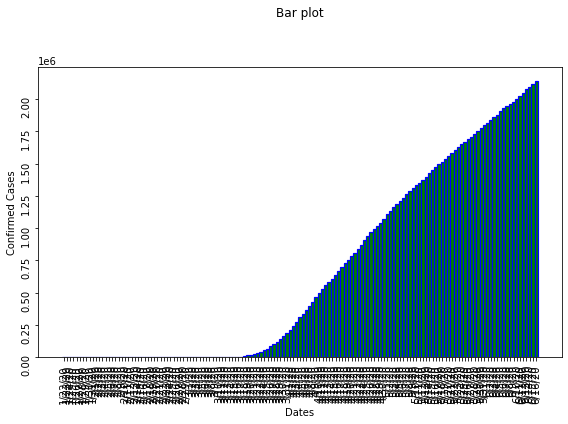

>: end


In [30]:
agt.interface()